## 1 : We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

In [32]:
#defining periodic function
def year_temp_function(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(year_temp_function, months,Max, [40, 20,0])
res_min, cov_min = optimize.curve_fit(year_temp_function, months,Min, [-40, 20,0])

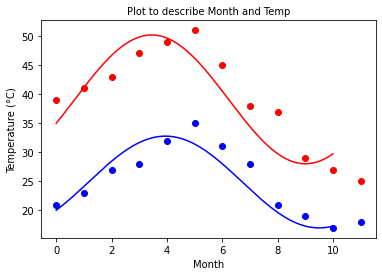

In [33]:
#2. plot the fit
days = np.linspace(0, 10, num=365)
plt.figure()
plt.plot(months,Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months,Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Plot to describe Month and Temp', fontsize = 10)
plt.show()

## 2: This assignment is for visualization using matplotlib

In [5]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
data = pd.read_csv(url)

In [6]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1. Create a pie chart presenting the male/female proportion

In [7]:
sex_ratio= (data['sex'].value_counts(1)*100).round(2)
pd.DataFrame(sex_ratio)

,sex
male,64.4
female,35.6


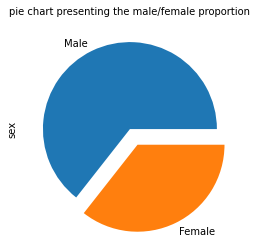

In [24]:
data['sex'].value_counts().plot(kind = 'pie', explode = [0, 0.2], labels = ['Male','Female'])
#plt.axis('off')
plt.title('pie chart presenting the male/female proportion', fontsize = 10)
plt.show()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

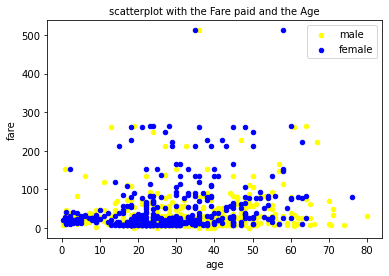

In [25]:
cat1 = data[data.sex=='male'].plot.scatter('age', 'fare', color='yellow',label='male')
data[data.sex=='female'].plot.scatter('age', 'fare',color='blue',label='female',ax=cat1)
plt.title('scatterplot with the Fare paid and the Age', fontsize = 10)
plt.show()